#### 1. Transformer 등장 배경
- RNN 계열은 긴 시퀀스를 처리할 때 순차적으로 처리하기 때문에 느림+장기 의존성 문제를 해결하지 못함.
  - 장기 의존성(Long-term Dependency) : 은닉층의 과거 정보가 마지막까지 전달되지 못하는 현상

> 2017년 구글 발표 (논문 Attention is all you need에서 나온 모델)
> 기존의 seq2seq의 구조(LSTM 단위)인 인코더-디코더를 따르면서도, 어텐션(Attention)만으로 구현한 모델
  - 단어 입력을 순차적으로 받는 것이 아니기 때문에 연산 속도가 빠름.(병렬연산)

### 2. Transformer 구조
- Positional Encoding (위치 인코딩)
  - Self-Attention 기반 모델은 입력 순서를 순차적으로 처리하지는 못함
  - 토큰 간의 순서 정보를 알려주기 위해 사용 (한 문장을 병렬처리 + 각 단어 위치 인지)

- Encoder Self-Attention
  - 인코더는 입력 문장의 모든 단어 간의 관계를 계산하여, 문장 전체에서 중요한 정보를 파악

- Add & Norm
  - 출력에 원래 입력을 더하고, 값을 정규화하여 안정된 학습에 도움

- Feed Forward
  - 활성화 함수(ReLU)를 사용해 입력 처리, 비선형성을 통해 모델이 복잡한 패턴을 학습할 수 있게 만드는 완전 연결 신경망 (MLP)

- Masked Decoder Self-Attention
  - 디코더가 예측할 때 미래 단어를 참조하지 못하게 막아, 이전 단어들만을 사용해 순차적으로 예측

- Encoder-Decoder Self-Attention
  - Seq2Seq Attention 에서 발전된 형태
  - 디코더가 인코더의 출력을 참조하여, 입력 문장과의 관계를 기반으로 더 정확한 출력을 생성

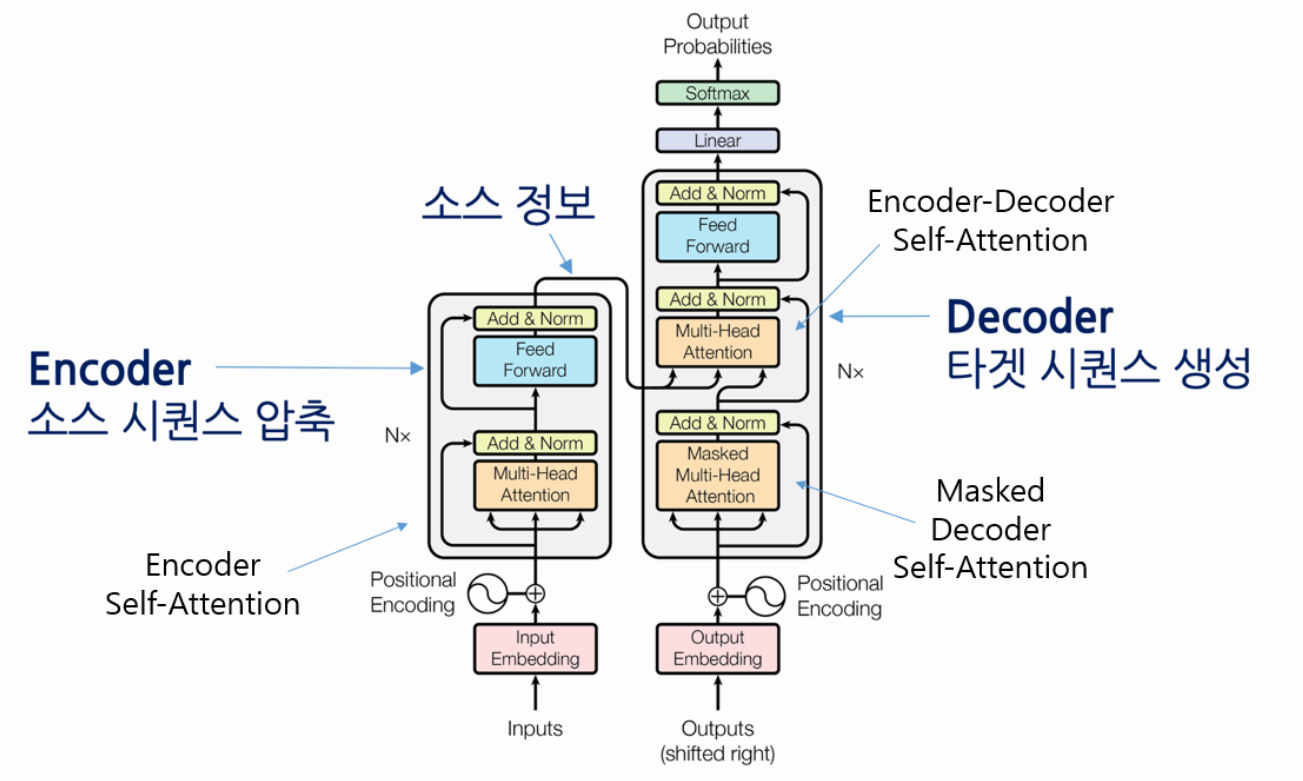

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%cd /content/drive/MyDrive/Colab Notebooks/SW엔지니어

/content/drive/MyDrive/Colab Notebooks/SW엔지니어


### Hugging Face Transformers 라이브러리 설치하기
- Hugging Face: 인공지능 관련 데이터셋, 모델, 테스팅 공간 등을 공유하는 커뮤니티 웹 서비스

In [4]:
!pip -q install transformers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 14.5 MB/s eta 0:00:00


#### NLP(Natural Language Processing) Task 맛보기
- 허깅페이스 트렌스포머 도큐먼트 : https://huggingface.co/learn/llm-course/ko/chapter1/3?fw=pt

### 1. BERT 계열 - 감성분석 (Sentiment-analysis)

- Bert 계열
  - Transformer 모델의 Encoder만 활용
  - 입력 전체를 한 번에 보고 양방향으로 학습 (Bidirectional)
  - 대표 모델 : BERT, ELECTRA 등
  - 주로 문장 분류, 개체명 인식, 문장 유사도 등 전체 문장에 대한 이해를 요구하는 작업에서 사용됨

- 감성분석 : 텍스트 내에서 사람의 기분, 감정, 의견 등을 예측하는 기술
- TextClassification : 텍스트를 입력 받아 어떤 종류의 범주에 속하는지 구분하는 작업

In [15]:
from transformers import pipeline
# pipeline : 감성 분석, 번역, 요약 등 다양한 Task를 한 줄로 수행할 수 있게하는 고수준 함수

- 실습용 사전학습 Model 경로 : https://huggingface.co/daekeun-ml/koelectra-small-v3-nsmc
- koelectra-small-v3-nsmc : 네이버 영화 리뷰 데이터 셋으로 Finetuning 된 KoElectra Model
- daekeun-ml/ : 사용자

- KoELECTRA
  - 한국어에 특화된 ELECTRA 모델
  - 초기 BERT에 비해 학습 효율(속도나 성능) 측면에서 유리하게 만들어짐

In [16]:
# 한국어 분류 모델 Pipeline 로드
classifier = pipeline(
    model = 'daekeun-ml/koelectra-small-v3-nsmc', # 사용할 사전 학습 모델 경로
    task = 'sentiment-analysis',
    device = 0 # GPU 사용 (CPU = -1)
)

Device set to use cuda:0


### Pipeline Task 종류

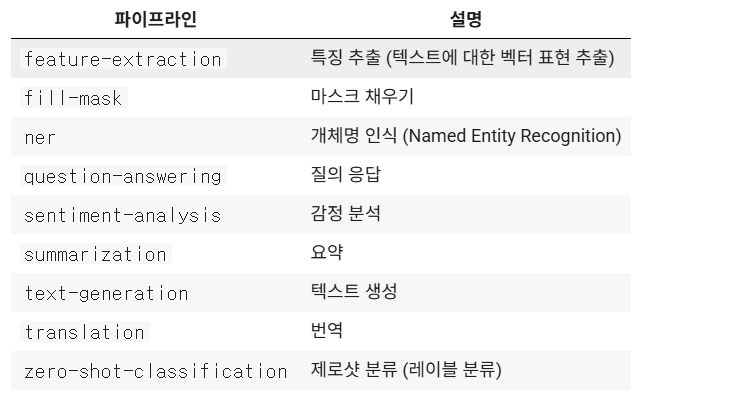

In [7]:
# 예측 수행 (0 : 부정, 1 : 긍정)
classifier('넌 정말 좋은 사람이야')

[{'label': '1', 'score': 0.9870152473449707}]

In [6]:
classifier(['완전 재미잇는 영화','우와 재미없어요','제가 보기에는 그럭저럭 이었던 것 같아요','나는 재밌게 봤는데 다른사람들은 어떨지 모르겠네요'])

[{'label': '1', 'score': 0.9947404265403748},
 {'label': '0', 'score': 0.9995030164718628},
 {'label': '0', 'score': 0.5416658520698547},
 {'label': '1', 'score': 0.9836767911911011}]

### 2. Seq2Seq 계열 - 문장번역(Translation)
- Seq2Seq (Encoding -> Decoding) 구조
  - 다양한 생성, 이해 작업에 강점을 가짐
  - 대표 모델 : T5, BART 등
  - 주로 제로샷 분류, 요약/번역/재작성 등에 사용

In [17]:
ko_to_en = pipeline(
    model = 'Helsinki-NLP/opus-mt-ko-en',
    task = 'translation',
    device = 0
)

Device set to use cuda:0


In [9]:
!pip install sacremoses
# sacremoses : 주로 텍스트 전처리(토큰화, 정규화) 품질을 높여줌

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 17.3 MB/s eta 0:00:00


In [10]:
ko_to_en('와우 오늘도 힘차고 밝은 하루! 당신의 오늘과 내일이 아주 좋은 일들만 일어나길 기원합니다')

[{'translation_text': 'I hope that your day and tomorrow will be just the best thing that can happen.'}]

In [11]:
ko_to_en('얼른 집에 가서 스타듀밸리를 해야겠오! 바로 6시가 되기만 해봐라!')

[{'translation_text': "I'm going home and I'm going to play Stardue Valley."}]

In [12]:
ko_to_en('집에 가고 싶다. 6시 칼퇴')
# 모델이 학습하지 않은 텍스트는 출력되지 않는다.

[{'translation_text': 'I want to go home.'}]

### 3. Zero-shot Classification (제로샷 분류)
- 사전 훈련된 NLI 모델 (Natural Language Inference)를 이용해 새로운 라벨(클래스)에도 별도 학습 없이 분류를 수행하는 Task
- 텍스트에 레이블을 다는 것은 시간이 많이 소요되고 도메인 지식이 필요하기 때문에 이러한 task는 실제 프로젝트에서 아주 흔한 상황
   - 입력 문장과 후보 라벨(프롬프트로 구성) 간의 연관성을 점수화 하여 가장 적합한 라벨 예측
   - 텍스트 마이닝(ex. 추상적인 Topic을 발견)에서도 활용

- 장점
  - 학습데이터가 없거나 부족한 도메인에서도 즉시 분류 가능
  - 유연하게 라벨을 추가/변경 가능

- 단점
  - NLI모델이 다루지 못하는 복잡한 Tesk에서는 성능 저하
  - 라벨 문장(프롬프트) 설계에 따라 결과가 민감하게 변동됨

In [18]:
  # RoBERTa Model 로드
  # xlm-roberta-large-xnli : 한국어 포함 총 100여개 언어 지원, 가장 널리 쓰이는 제로샷 분류용 모델
classifier = pipeline(
    model = 'joeddav/xlm-roberta-large-xnli',
    task = 'zero-shot-classification',
    device = 0
)

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


In [19]:
# 분류할 문장 정의
sequences = ['제가 그렇게 오랜 인생 많은 풍파를 겪은 인생은 아니지만 이 드라마의 휴머니즘 만큼은 깊게 느낄 수 있을 것 같습니다. 배우님들의 연기력은 어느 하나 나무랄 데가 없어 어느 시점 부터는 드라마가 아닌 하나의 다큐멘터리, 한 사람의 일생을 들여다보는 느낌이 들 정도로 몰입감이 뛰어났고, 때문에 너무 편안하게, 너무 편견없이 몰입 할 수 있는 훌륭한 작품을 피부로 느꼈습니다. 모든 배우 한 분 한 분 모두 드라마에 얼룩 되지 않고 잘 어우러져 편안함은 물론 드라마의 흐름을 너무나 잘 이끌어 주어 몰입하여 시청 하였지만 그 중 단연 염혜란님의 연기는 정말 감탄과 경이로움을 금치 못할 정도의 경지에 이르르지 않았나 느껴지네요 연출, 스토리, 연기 이외의 모든 요소들이 너무나도 잘 어우러져 제 짧은 인생 최고의 드라마를 이번에 접하게 된 것에 영광을 누립니다. 억지 멜로가 아닌 억지 감동이 아닌 사람이라면 인생에 녹아있을 이런 이야기는 언제나 두 팔 벌려 환영합니다. 감사합니다.',
             '안녕하세요 저는 건강이 좋치않아서 태국에서 하루 하루 죽을날만 기다리고 있는 50대 중반의 남자입니다. 정말 마지막까지 잘보았습니다. 드라마를 마지막까지 보면서 이렇게 많은 눈물을 흘려보기는 처음입니다. 배우들의 한 대사 한 대사가 제가 이제까지 살아온 55년의 세월들을 하염없이 초라하고 부끄럽게 만드는데 감동과 부끄러움의 감정이 섞기어서 한없이 울기만 하였습니다. 사실 이제까지 살아온 제삶이 극중에서 (부상길)최 대훈님 삶이라서요. 아무튼 김 원석 감독님. 임 상춘 작가님. 박 해준 박 보금님.문 소리 아이유님. 이렇게 좋은 드라마를 죽기전 두번다시 볼수있을지 없을지 모르지만 제자신을 다시한번 돌아볼수있게 하여준 (폭싹 속았수다)드라마에 정말 감사합니다... 추신: 고) 강 명주님     삼가 고인의 명복을 빕니다...',
             '윤석열 전 대통령의 내란과 외환 혐의 등을 수사하는 내란 특검이 윤 전 대통령의 출국을 금지한 것으로 25일 확인됐다. 본지 취재를 종합하면, 내란 특검은 경찰과 검찰 비상계엄 특별수사본부로부터 윤 전 대통령 관련 사건을 넘겨 받은 뒤 윤 전 대통령의 출국금지를 법무부에 신청했다. 앞서 검찰과 고위공직자범죄수사처(공수처)는 지난해 12월 윤 전 대통령에 대해 출국금지를 신청했고, 법무부는 이를 승인한 바 있다. 이후 윤 전 대통령은 지난 1월 26일 내란 우두머리 혐의로 구속 기소됐다. 그러나 서울중앙지법 형사25부(재판장 지귀연)가 지난 3월 윤 전 대통령의 구속을 취소하자, 검찰은 출국금지를 다시 신청해 승인 받았다. 구속 상태에서는 출국금지를 할 이유가 없지만, 윤 전 대통령이 석방되자 원활한 재판 진행을 위해 출국금지 조치를 했다는 것이다. 이후 특검이 검·경으로부터 윤 전 대통령 사건을 넘겨 받으면서 다시 출국금지 조치를 했다고 한다. 통상 수사기관은 수사 중인 피의자가 해외로 도피하지 못하도록 출국금지 조치를 한다. 1개월 단위로 출국금지를 연장할 수 있다. 또 형사재판이 진행 중인 피고인의 경우에도 최대 6개월까지 출국금지 조치를 할 수 있다.']

In [22]:
# 후보 라벨(토픽) 목록
candidate_labels = ['드라마/영화', '정치', '사회/기술', '경제', '음식', '스포츠']

In [23]:
# 제로샷 분류 수행
results = classifier(
    sequences,         # 분류할 문장 리스트
    candidate_labels,   # 예측할 토픽(레이블) 리스트
    multi_label = True  # True 설정 : 다중 라벨, False : 단일 라벨
)

In [26]:
results[0].keys()

dict_keys(['sequence', 'labels', 'scores'])

In [30]:
# 결과 출력
for re in results:
  print(f"입력문장 : {re['sequence']}")
  print(re['labels'][0]) # labels의 가장 높은 확신도를 가진 라벨
  print(re['scores'][0],'\n') # scores의 가장 높은 확신도를 가진 라벨

입력문장 : 제가 그렇게 오랜 인생 많은 풍파를 겪은 인생은 아니지만 이 드라마의 휴머니즘 만큼은 깊게 느낄 수 있을 것 같습니다. 배우님들의 연기력은 어느 하나 나무랄 데가 없어 어느 시점 부터는 드라마가 아닌 하나의 다큐멘터리, 한 사람의 일생을 들여다보는 느낌이 들 정도로 몰입감이 뛰어났고, 때문에 너무 편안하게, 너무 편견없이 몰입 할 수 있는 훌륭한 작품을 피부로 느꼈습니다. 모든 배우 한 분 한 분 모두 드라마에 얼룩 되지 않고 잘 어우러져 편안함은 물론 드라마의 흐름을 너무나 잘 이끌어 주어 몰입하여 시청 하였지만 그 중 단연 염혜란님의 연기는 정말 감탄과 경이로움을 금치 못할 정도의 경지에 이르르지 않았나 느껴지네요 연출, 스토리, 연기 이외의 모든 요소들이 너무나도 잘 어우러져 제 짧은 인생 최고의 드라마를 이번에 접하게 된 것에 영광을 누립니다. 억지 멜로가 아닌 억지 감동이 아닌 사람이라면 인생에 녹아있을 이런 이야기는 언제나 두 팔 벌려 환영합니다. 감사합니다.
드라마/영화
0.9790155291557312 

입력문장 : 안녕하세요 저는 건강이 좋치않아서 태국에서 하루 하루 죽을날만 기다리고 있는 50대 중반의 남자입니다. 정말 마지막까지 잘보았습니다. 드라마를 마지막까지 보면서 이렇게 많은 눈물을 흘려보기는 처음입니다. 배우들의 한 대사 한 대사가 제가 이제까지 살아온 55년의 세월들을 하염없이 초라하고 부끄럽게 만드는데 감동과 부끄러움의 감정이 섞기어서 한없이 울기만 하였습니다. 사실 이제까지 살아온 제삶이 극중에서 (부상길)최 대훈님 삶이라서요. 아무튼 김 원석 감독님. 임 상춘 작가님. 박 해준 박 보금님.문 소리 아이유님. 이렇게 좋은 드라마를 죽기전 두번다시 볼수있을지 없을지 모르지만 제자신을 다시한번 돌아볼수있게 하여준 (폭싹 속았수다)드라마에 정말 감사합니다... 추신: 고) 강 명주님     삼가 고인의 명복을 빕니다...
드라마/영화
0.9852095246315002 

입력문장 : 윤석열 전 대통령의 내란과 외환 혐의

- 파이프라인 활용 : 토크나이징 -> 모델 예측 -> 결과 해석의 과정을 한 번에 처리 가능
- 단점 : 커스터마이징(ex. FineTuning 등), 배치, 학습 불가

- 직접 모델 호출 : 세부 제어 가능, 커스터마이징 가능
- 단점 : 코드 작성량 증가, 전처리 직접 구현하는 비용 필요

### 4. 직접 모델 로드
- 토크나이저 koElectra 모델 로드
- 인코딩 된 입력을 모델에 전달

- koElectra 사전학습 모델
  - https://huggingface.co/monologg/koelectra-small-finetuned-nsmc
  - 깃헙 링크 : https://github.com/monologg/KoELECTRA
  - monologg 팀 (한국어 NLP 엔지니어팀). 다양한 크기('base', 'small'), 버전으로 공개
  - 이진분류 모델

In [31]:
pipe = pipeline('text-classification', model = 'monologg/koelectra-small-finetuned-nsmc')

config.json:   0%|          | 0.00/756 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/55.1M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/102 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/247k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [33]:
# 예시 문장
sentence = '살다가 지칠 때 문득 생각날 것 같은 드라마'
pipe(sentence)

[{'label': 'positive', 'score': 0.9557926654815674}]

4.1 토크나이저, koElectra 모델 로드

In [36]:
# 모델 직접 로드
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# AutoTokenizer : 다양한 사전학습 토크나이저를 자동으로 로드해주는 클래스
# AutoModelForSequenceClassification : 시퀀스 분류용 모델 자동 로드 클래스

tokenizer = AutoTokenizer.from_pretrained('monologg/koelectra-small-finetuned-nsmc')
model = AutoModelForSequenceClassification.from_pretrained('monologg/koelectra-small-finetuned-nsmc')